In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ETH-USD.csv', index_col = "Date", parse_dates = True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [4]:
# удаляем ненужные строки
df.drop(['Open','Low','Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [5]:
df.head()

,High
Date,
2017-11-09,329.451996
2017-11-10,324.717987
2017-11-11,319.453003
2017-11-12,319.153015
2017-11-13,328.415009


In [6]:
df.shape

(1598, 1)

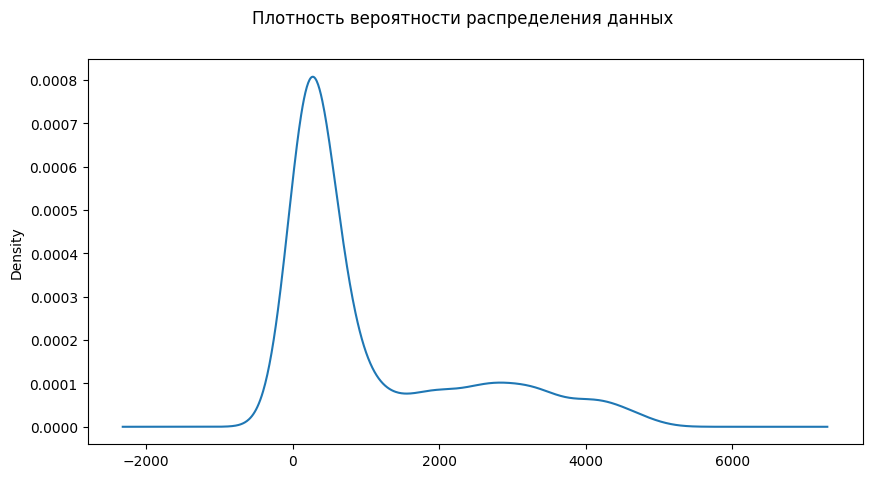

In [7]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
df.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

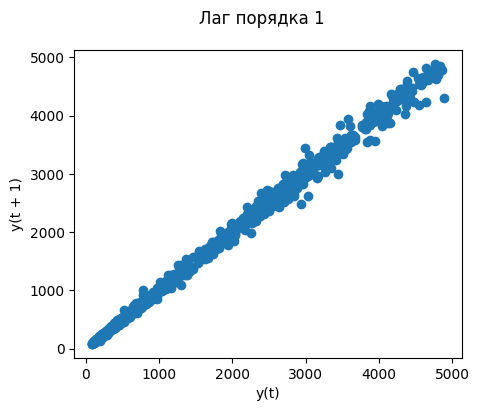

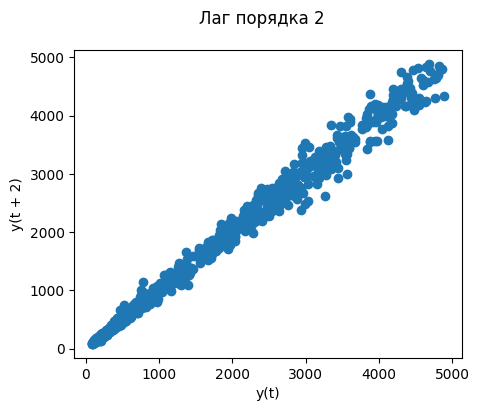

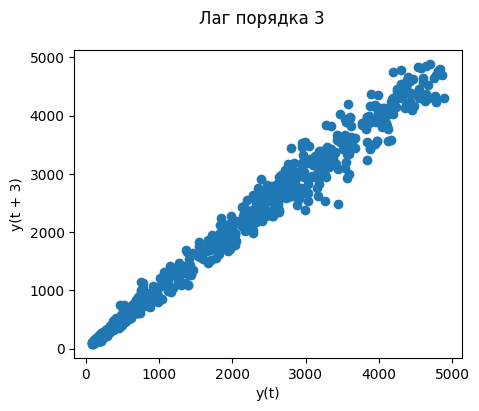

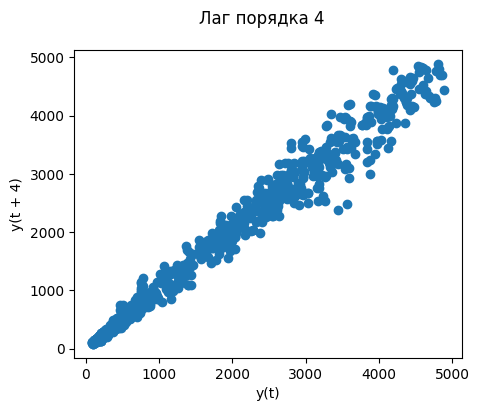

In [8]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(df, lag=i, ax=ax)
    pyplot.show()

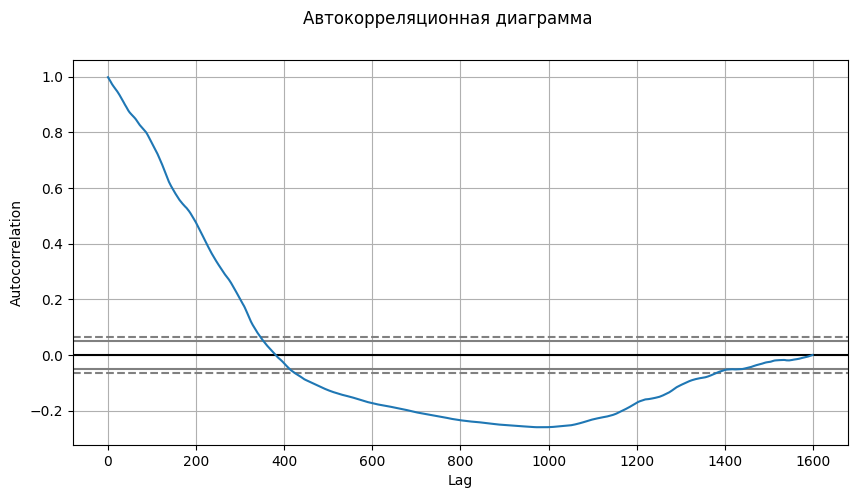

In [9]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(df, ax=ax)
pyplot.show()

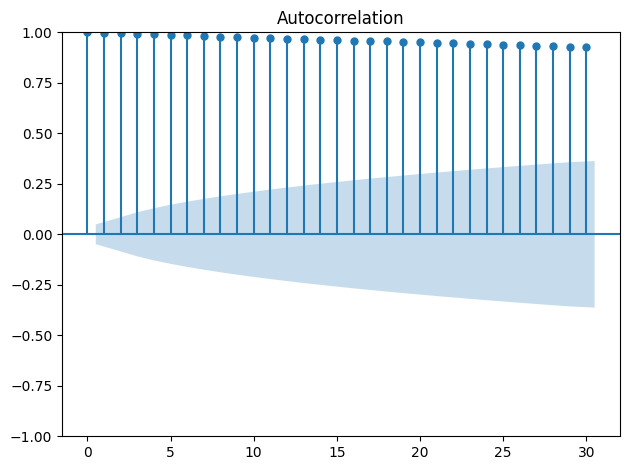

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=30)
plt.tight_layout()

In [11]:
df.index = pd.to_datetime(df.index)

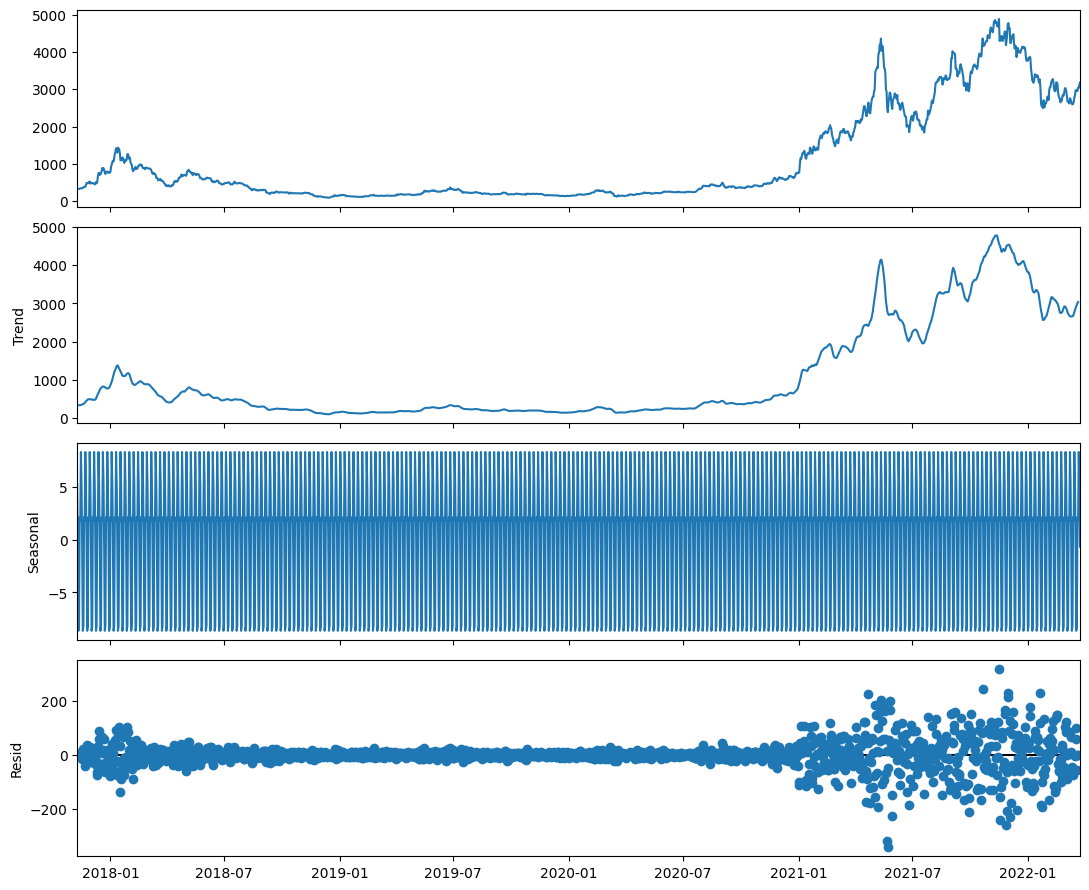

In [12]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о ethereum
decompose = seasonal_decompose(df)
decompose.plot()
 
plt.show()

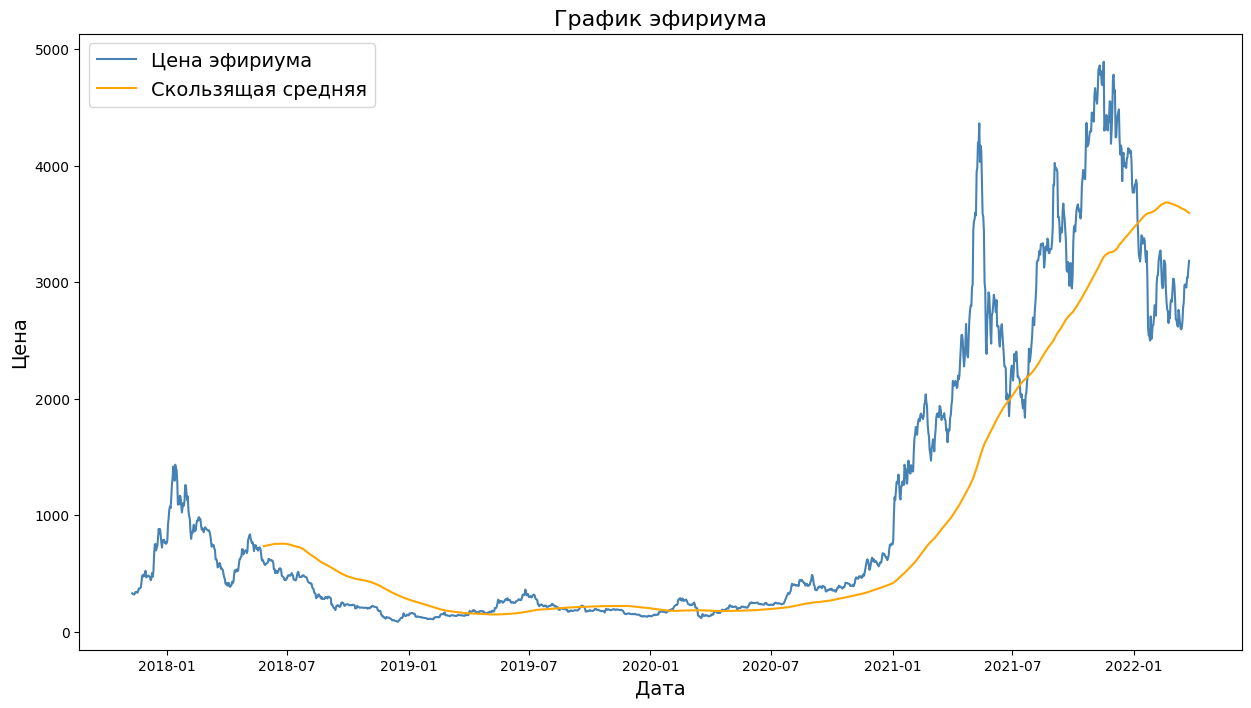

In [13]:
# зададим размер графика
plt.figure(figsize = (15,8))
 
# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(df, label = 'Цена эфириума', color = 'steelblue')
plt.plot(df.rolling(window = 200).mean(), label = 'Скользящая средняя', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.title('График эфириума', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

In [14]:
# импортируем необходимую функцию 
from statsmodels.tsa.stattools import adfuller
 
# передадим ей столбец с данными о ethereum и поместим результат в adf_test
adf_test = adfuller(df['High'])
 
# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.8489740781601891


In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [16]:
xnum = list(range(df.shape[0]))
Y = df['High'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]

In [17]:
history_arima = [x for x in train]
history_es = [x for x in train]

In [18]:
arima_order = (6,1,0)

In [19]:
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])

In [20]:
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [21]:
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])

In [22]:
error_es = mean_squared_error(test, predictions_es, squared=False)

In [23]:
df['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
df['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

In [24]:
#Simple Moving Average - сглаживание временных рядов
df['SMA'] = df['High'].rolling(30, min_periods=1).mean()

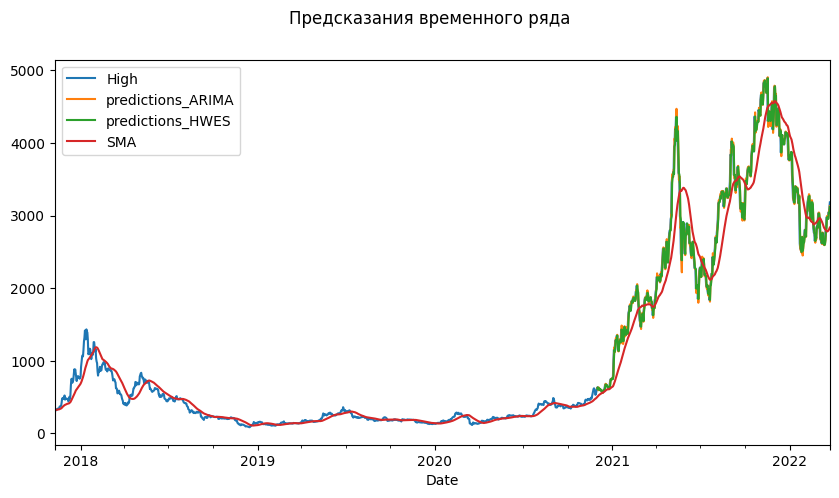

In [25]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
df.plot(ax=ax, legend=True)
pyplot.show()

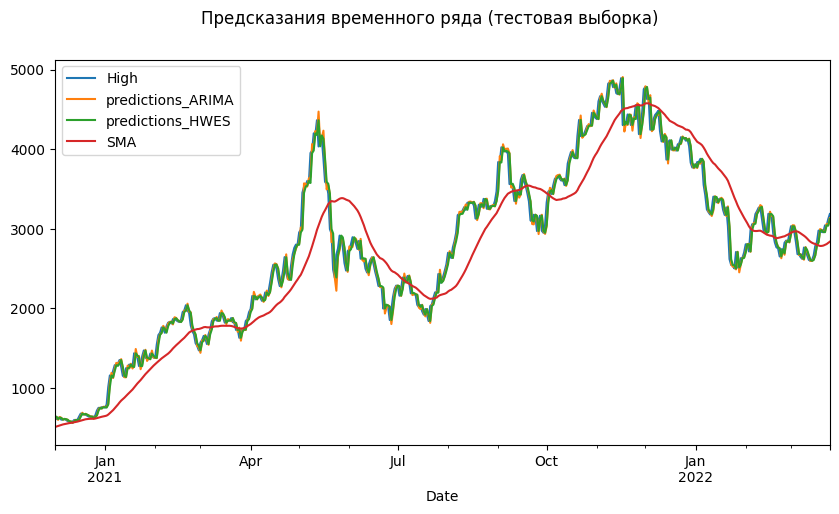

In [26]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
df[train_size:].plot(ax=ax, legend=True)
pyplot.show()

In [27]:
from gplearn.genetic import SymbolicRegressor

In [29]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=70, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

In [30]:
est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      4.19731e+70       26           135469              N/A      1.84m
   1   158.73      1.77597e+15       37           132528              N/A     53.56s
   2   134.67      2.23919e+28       17           107124              N/A     43.39s
   3    40.97      5.28735e+09       43          89212.2              N/A     20.48s
   4    32.39      3.05278e+11       33          62439.1              N/A     18.89s
   5    33.44      6.69704e+08       37          58180.5              N/A     18.70s
   6    45.99      5.21278e+08       37          58180.5              N/A     20.68s
   7    50.58      1.27227e+07       47          55642.5              N/A     21.10s
   8    52.94      1.60121e+07       48            54613              N/A  

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=70, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [31]:
# Предсказания
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:10]

array([503.36249477, 676.10939307, 816.31057581, 692.80083945,
       526.41163213, 466.23552547, 512.74001176, 689.09496387,
       923.1269464 , 852.49868647])

In [32]:
df['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

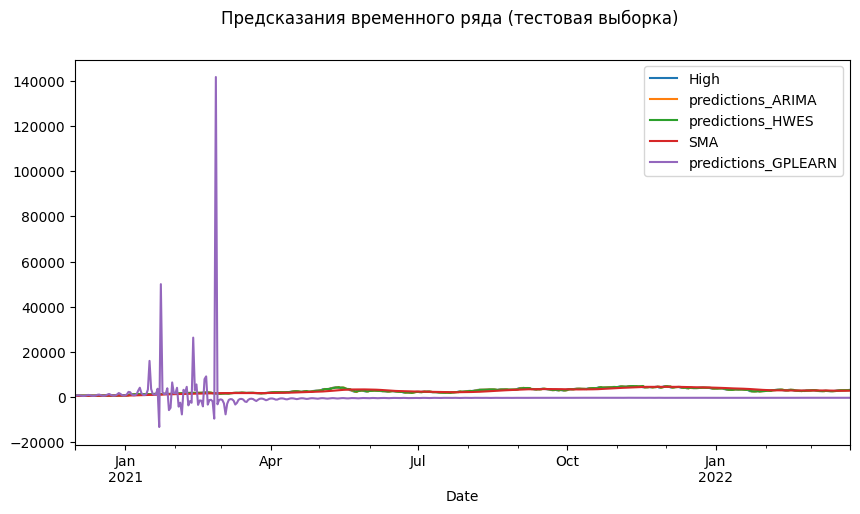

In [33]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
df[train_size:].plot(ax=ax, legend=True)
pyplot.show()